**Project Planning Report - Ashlee Zhu, 46** 
-


**Data Description** 
- 


The `players.csv` dataset is collected through a Minecraft server created by a UBC computer science research group  who are investigating player behaviour in video games in hopes of creating an artificial intelligence (AI) that is able to mimic human behaviours and interact with players in a virtual gaming environment.

The `players.csv` dataset is a comma separated file, containing 7 variables and 196 observations. The variables in the dataset are either categorical (chr), numerical (dbl), or logical (lgl) types, with each row in the dataset representing a different player.  

**Summary Statistics**

Based on the `players.csv` dataset, the average hours played is 5.85 and the average age of players is 21.

**7 Variables - Type and Meaning** 

- `experience` (character type): Describes each player's skill level as being either Amateur, Beginner, Pro, Regular, or Veteran. 
- `subscribe` (logical type): Whether or not the player is subscribed to the game's newsletter. 
- `hashedEmail` (character type): Unique email identifier of each player. 
- `played_hours` (numeric type; doubles/decimal numbers): The number of hours played when data was collected. 
- `name` (character type): The name of each player. 
- `gender` (character type): The gender of each player (Male, Female, Non-Binary, Agender, Two-Spirited, Prefer not to say, and Other). 
- `Age` (numeric type; doubles/decimal numbers): The age of each player.

**Issues in `players.csv` dataset**

The `players.csv` dataset contains a few issues that must be considered before data wrangling:

- The `subscribe` variable is of logical type, thus it must be changed to factor type (catergorical) before undergoing k-nn classification.
- The `Age` variable contains missing data (NA values). It has two NA values in its column, thus R must be told to ignore the missing data.
- The dataset is not quite tidy. The variable `Age` starts capitilized, whereas all other variables starts with lowercase. The variable `played_hours` is separated by an underscore `_` , whereas the variable `hashedEmail` is not. This issue will not affect the data wrangling process, however it must be noted that the dataset is not tidy. 


In [7]:
library(tidyverse)

In [15]:
#Loading dataset into R.
players <- read_csv("players.csv")
players 

#Calculating summary statistics of average played_hours and average Age.
sum_mean <- players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)
sum_mean


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


**Question** 
-

**Broad Question**

Using the `players.csv` dataset, an investigation is conducted on what player characteristics and behaviours are most predictive of subscribing to game-related newsletter, and how do these features differ between various player types?  

**Specific Question**

Can the age of players predict whether or not they will subscribe to game-related newsletter based on the `players.csv` dataset? 

This data will help address this question using the K-nearest neighbors classification algorithm. Based on the age, k-nn classification will classify the player as either subscribing to the newsletter or not subscribing to the newsletter. 


**Exploratory Data Analysis and Visualization** 
- 



Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


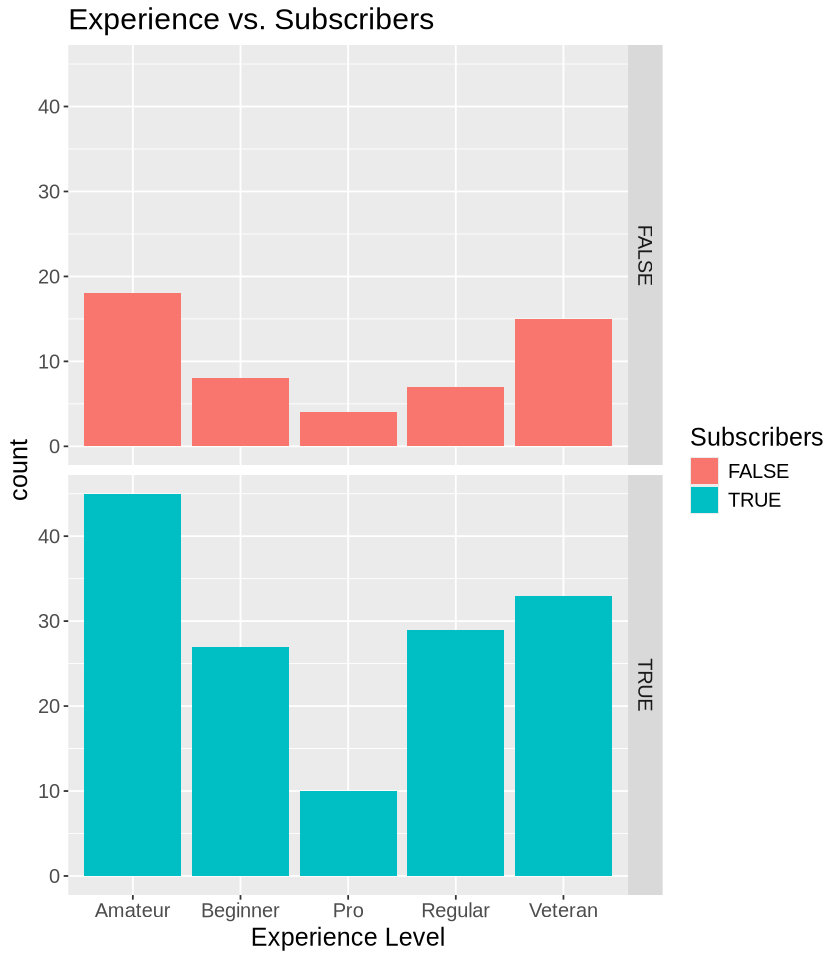

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


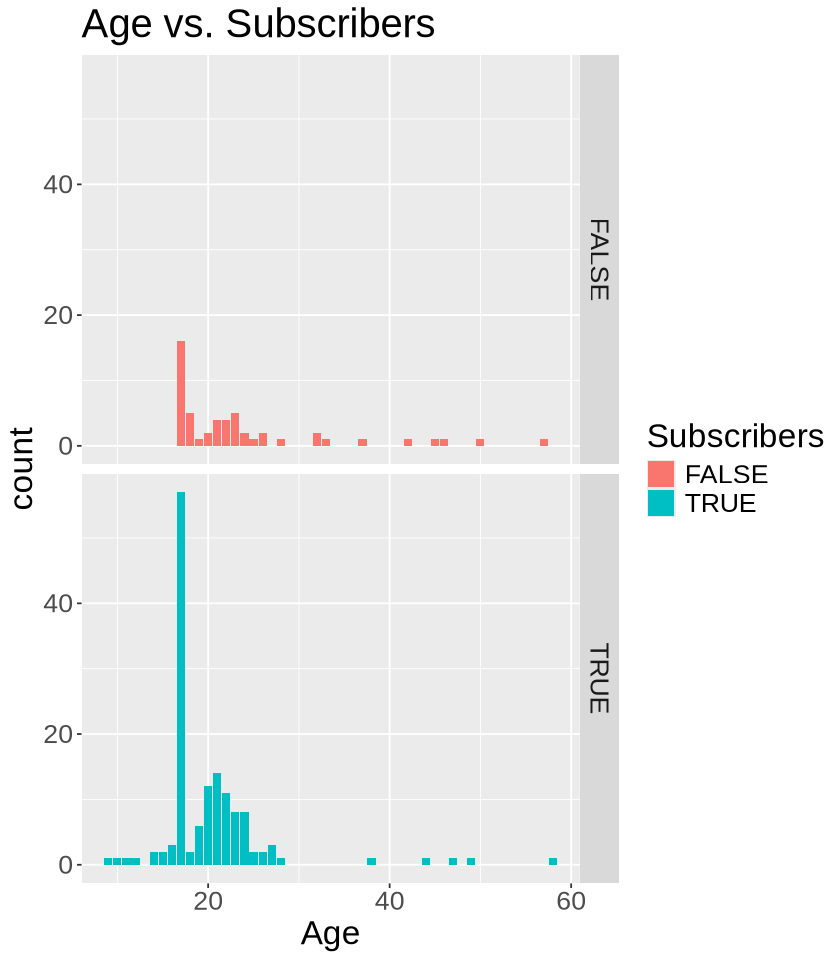

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


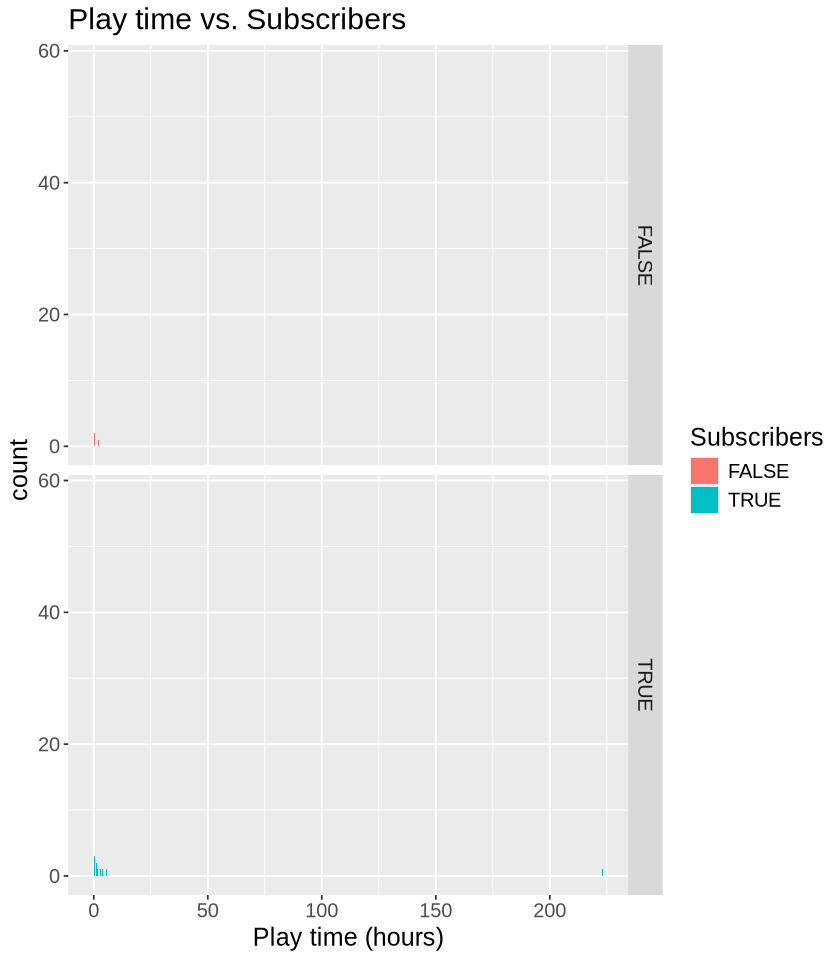

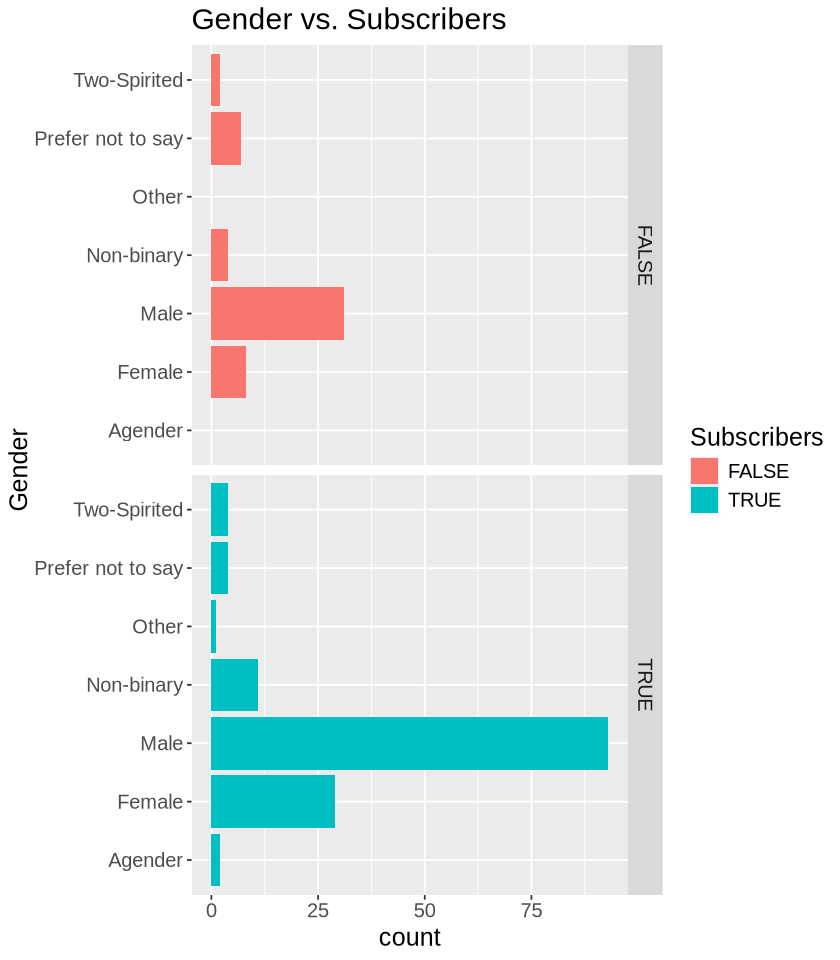

In [80]:
#Changing the subscribe variable from logical type to factor type. 
players <- players |>
    mutate(subscribe = as_factor(subscribe))


#Renaming the dataset variable titles (tidying). 
players_tidy <- rename(players, 
                       hashed_email = hashedEmail, 
                       age = Age)

#Mean value for each quantitative variable (played_hours and age).
players_mean <- players_tidy |>
    select(played_hours, age) |>
    map_dfr(mean, na.rm = TRUE)

#Exploratory plots (response variable: subscribe). Which are the best explanatory variable(s)?
exp_plot <- ggplot(players_tidy, aes(x = experience, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Experience Level", fill = "Subscribers") +
    ggtitle("Experience vs. Subscribers") +
    theme(text = element_text(size = 15))
exp_plot

age_plot <- ggplot(players_tidy, aes(x = age, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Age", fill = "Subscribers") +
    ggtitle("Age vs. Subscribers") +
    theme(text = element_text(size = 20))
age_plot

played_hours_plot <- ggplot(players_tidy, aes(x = played_hours, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Play time (hours)", fill = "Subscribers") +
    ggtitle("Play time vs. Subscribers") +
    theme(text = element_text(size = 15))
played_hours_plot

gender_plot <- ggplot(players_tidy, aes(y = gender, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(y = "Gender", fill = "Subscribers") +
    ggtitle("Gender vs. Subscribers") +
    theme(text = element_text(size = 15))
gender_plot